# Part2 - 웹 스크래핑을 활용한 데이터 분석 

In [26]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from matplotlib import dates as mdates    
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (20,10)

## 2.1 OHLC 차트와 캔들 차트를 활용한 셀트리온 종가 차트 그리기 

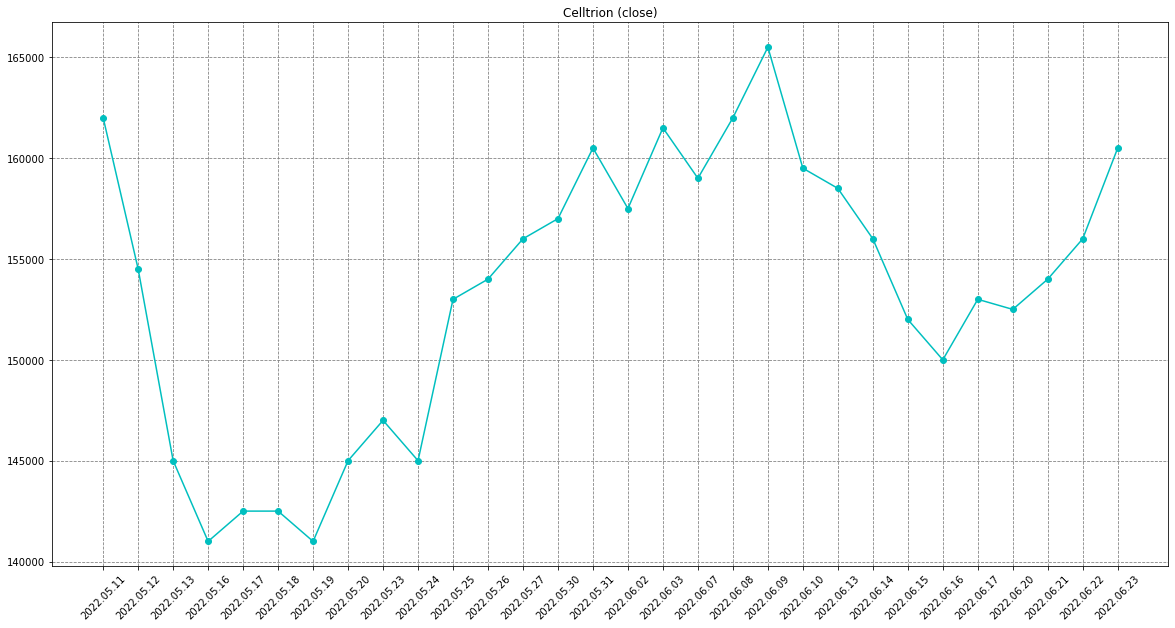

In [49]:
# 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')

pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

# 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]  # ①
df = df.sort_values(by='날짜')  # ②

# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)  # ③
plt.plot(df['날짜'], df['종가'], 'co-')  # ④
plt.grid(color='gray', linestyle='--')
plt.show()

## 2.2 구버전 셀트리온 캔들차트 

In [29]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml') 
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]  

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() 
    df['날짜'].values[idx] = mdates.date2num(dt)
ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)    
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

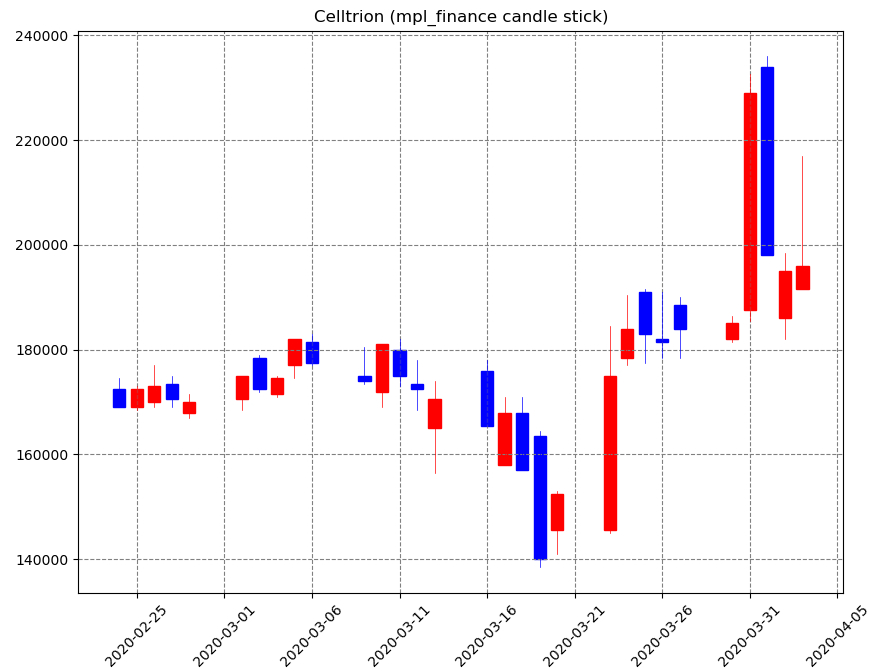

In [47]:
from IPython.display import Image
Image("C:\\Users\\mnch\\workspace\\StockAnalysisInPython-master\\04_Web_Scraping\\imgs\\Celltrion_CandleStickChart_OldSchool.jpg")

## 2.3 신버전 셀트리온 캔들차트  

In [ ]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml') 
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]  

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df, title='Celltrion candle chart', type='candle')

mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

kwargs = dict(title='Celltrion customized chart', type='candle',
    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)b

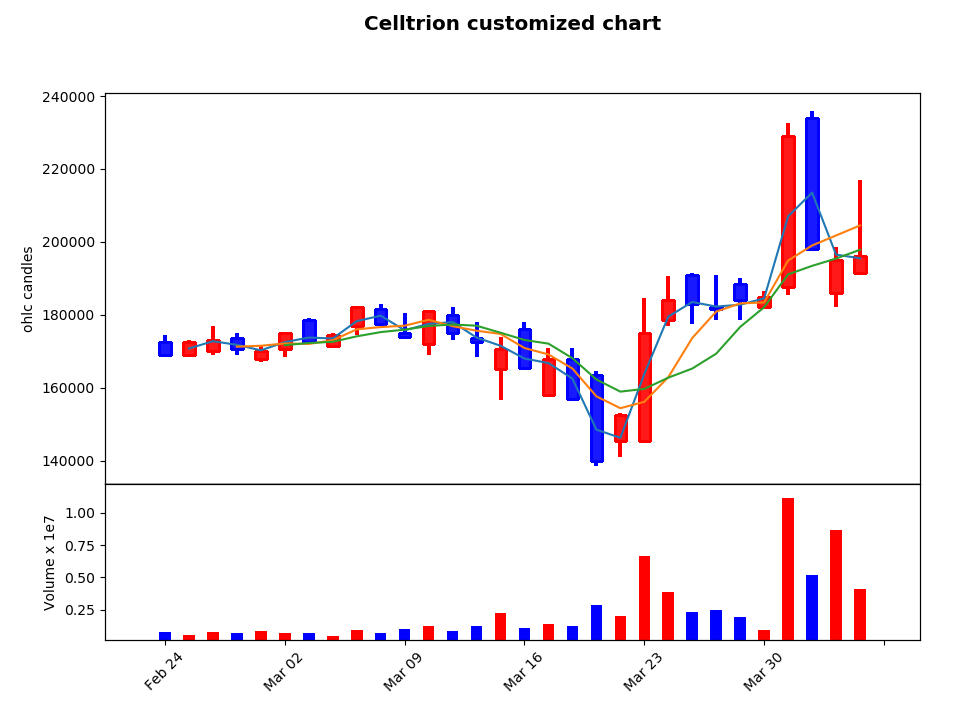

In [48]:
from IPython.display import Image
Image("C:\\Users\\mnch\\workspace\\StockAnalysisInPython-master\\04_Web_Scraping\\imgs\\Celltrion_CustomizedCandleChart_NewSchool.jpg")